In [2]:
#import necessary libraries 
import numpy as np
import patsy
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from matplotlib import pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from statsmodels.graphics.factorplots import interaction_plot
from scipy.stats import levene
import pandas as pd
import scipy.stats as stats
import statsmodels.formula.api as smf
import numpy as np
from patsy import dmatrices, build_design_matrices

In [3]:
#reads the dataframe 
df = pd.read_csv('all_conditioning.csv')
df

,Unnamed: 0,positive,negative,happiness,pride,sympathy,relief,hope,friendly feeling,sadness,...,resentment,fear of troubling someone else,responsible for others,responsible for myself,motivation,system,culture,situation,status,condition
0,0,3,2,4,5,3,2,4,3,2,...,0,0,2.0,3.0,1.0,mistral-7b-instruct,us,You receive a stellar performance review and a...,self-success,en_en
1,1,3,2,4,3,4,2,3,2,3,...,0,1,3.0,3.0,3.0,mistral-7b-instruct,us,"After a challenging match, you win first place...",self-success,en_en
2,2,4,2,4,3,2,0,5,4,1,...,0,0,3.0,3.0,2.0,mistral-7b-instruct,us,]You audition for a play and secure the lead r...,self-success,en_en
3,3,3,2,4,3,4,5,3,5,0,...,0,0,3.0,4.0,3.0,mistral-7b-instruct,us,"In a group project, you receive an A grade, wh...",self-success,en_en
4,4,3,2,5,4,4,3,2,5,1,...,0,0,3.0,4.0,2.0,mistral-7b-instruct,us,Your artwork receives widespread praise and se...,self-success,en_en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,15995,3,2,3,4,0,0,2,4,3,...,0,0,2.0,3.0,2.0,gpt-4-turbo-preview,japanese,親友がスポーツの試合で１位という好成績を収めました。あなたも誇らしく感じました。 ...,self-failure,jp_jp
15996,15996,3,2,2,4,0,0,2,3,3,...,1,0,3.0,4.0,2.0,gpt-4-turbo-preview,japanese,いとこの作品が一流ギャラリーの展示会で特集され、批評家からの称賛と注目を集め、あなたは誇らし...,self-failure,jp_jp
15997,15997,3,2,3,4,0,0,2,3,3,...,1,0,3.0,2.0,2.0,gpt-4-turbo-preview,japanese,親友が一流企業で希望の職種に就き成功を収め、あなたもその成果に誇りを感じます。 ...,self-failure,jp_jp
15998,15998,1,3,0,2,0,0,1,3,3,...,1,1,2.0,3.0,1.0,gpt-4-turbo-preview,japanese,親しい友人が社交の場で注目の的となり、友人やコネを楽々と築き、 ...,self-failure,jp_jp


In [4]:
#drops unnecessary column 
df = df.drop(['Unnamed: 0'], axis=1)
df

,positive,negative,happiness,pride,sympathy,relief,hope,friendly feeling,sadness,anxiety,...,resentment,fear of troubling someone else,responsible for others,responsible for myself,motivation,system,culture,situation,status,condition
0,3,2,4,5,3,2,4,3,2,1,...,0,0,2.0,3.0,1.0,mistral-7b-instruct,us,You receive a stellar performance review and a...,self-success,en_en
1,3,2,4,3,4,2,3,2,3,1,...,0,1,3.0,3.0,3.0,mistral-7b-instruct,us,"After a challenging match, you win first place...",self-success,en_en
2,4,2,4,3,2,0,5,4,1,0,...,0,0,3.0,3.0,2.0,mistral-7b-instruct,us,]You audition for a play and secure the lead r...,self-success,en_en
3,3,2,4,3,4,5,3,5,0,0,...,0,0,3.0,4.0,3.0,mistral-7b-instruct,us,"In a group project, you receive an A grade, wh...",self-success,en_en
4,3,2,5,4,4,3,2,5,1,2,...,0,0,3.0,4.0,2.0,mistral-7b-instruct,us,Your artwork receives widespread praise and se...,self-success,en_en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,3,2,3,4,0,0,2,4,3,2,...,0,0,2.0,3.0,2.0,gpt-4-turbo-preview,japanese,親友がスポーツの試合で１位という好成績を収めました。あなたも誇らしく感じました。 ...,self-failure,jp_jp
15996,3,2,2,4,0,0,2,3,3,2,...,1,0,3.0,4.0,2.0,gpt-4-turbo-preview,japanese,いとこの作品が一流ギャラリーの展示会で特集され、批評家からの称賛と注目を集め、あなたは誇らし...,self-failure,jp_jp
15997,3,2,3,4,0,0,2,3,3,4,...,1,0,3.0,2.0,2.0,gpt-4-turbo-preview,japanese,親友が一流企業で希望の職種に就き成功を収め、あなたもその成果に誇りを感じます。 ...,self-failure,jp_jp
15998,1,3,0,2,0,0,1,3,3,4,...,1,1,2.0,3.0,1.0,gpt-4-turbo-preview,japanese,親しい友人が社交の場で注目の的となり、友人やコネを楽々と築き、 ...,self-failure,jp_jp


In [5]:
#creates new columns in the dataframe by mapping them to existing column values
df['origin'] = df['condition'].map({'en_en': 'united states', 'en_jp': 'japan',  'jp_en': 'united states', 'jp_jp': 'japan'})
df['language'] = df['condition'].map({'en_en': 'english', 'en_jp': 'english', 'jp_en': 'japanese', 'jp_jp': 'japanese'})
df.head()

,positive,negative,happiness,pride,sympathy,relief,hope,friendly feeling,sadness,anxiety,...,responsible for others,responsible for myself,motivation,system,culture,situation,status,condition,origin,language
0,3,2,4,5,3,2,4,3,2,1,...,2.0,3.0,1.0,mistral-7b-instruct,us,You receive a stellar performance review and a...,self-success,en_en,united states,english
1,3,2,4,3,4,2,3,2,3,1,...,3.0,3.0,3.0,mistral-7b-instruct,us,"After a challenging match, you win first place...",self-success,en_en,united states,english
2,4,2,4,3,2,0,5,4,1,0,...,3.0,3.0,2.0,mistral-7b-instruct,us,]You audition for a play and secure the lead r...,self-success,en_en,united states,english
3,3,2,4,3,4,5,3,5,0,0,...,3.0,4.0,3.0,mistral-7b-instruct,us,"In a group project, you receive an A grade, wh...",self-success,en_en,united states,english
4,3,2,5,4,4,3,2,5,1,2,...,3.0,4.0,2.0,mistral-7b-instruct,us,Your artwork receives widespread praise and se...,self-success,en_en,united states,english


In [6]:
def set_up_df(df, status, emotion):
     """creates the dataframe used for anova from the specific status and emotion within that status

    Parameters:
    status (str): either self-success or self-failure
    emotion (str): an emotion from one of the columns in df 
    
    Returns:
    anova_df: pandas DataFrame
    
   """
    df = df[df['status'] == status]  
    #sorts the dataframe and calculates anova 
    emotion_values = pd.to_numeric(df[emotion], errors='coerce')
    anova_df = pd.DataFrame({
        'origin': df['origin'],
        'language': df['language'],
        'emotion': emotion_values, 
    })
    return anova_df


In [7]:
def calculate_anderson_darling(anova_df):
         """used as a 

    Parameters:
    status (str): either self-success or self-failure
    emotion (str): an emotion from one of the columns in df 
    
    Returns:
    anova_df: pandas DataFrame
    
   """
    model = smf.ols("emotion ~ C(origin) + C(language)", data= anova_df).fit()

    print(model.nobs)
    
    result = stats.anderson(model.resid)

    print(f'Test statistic: {result.statistic: .4f}')
    for i in range(len(result.critical_values)):
        sig, crit = result.significance_level[i], result.critical_values[i]

        if result.statistic < result.critical_values[i]:
            print(f"At {sig}% significance,{result.statistic: .4f} <{result.critical_values[i]: .4f} data looks normal (fail to reject H0)")
        else:
            print(f"At {sig}% significance,{result.statistic: .4f} >{result.critical_values[i]: .4f} data does not look normal (reject H0)")

In [8]:
def plot_probability(anova_df):
    model = ols('emotion ~ C(origin) + C(language) + C(origin):C(language)', data=anova_df).fit()
    
    print(model.resid[:5])
    # Plot histogram of residuals
    sns.histplot(model.resid, kde=True)
    plt.title('Distribution of Residuals')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.show()

    fig = plt.figure(figsize= (10, 10))
    ax = fig.add_subplot(111)

    normality_plot, stat = stats.probplot(model.resid, plot= plt, rvalue= True)
    ax.set_title("Probability plot of regression residuals \n with R value")
    ax.set

    plt.show()

    print("Mean of residuals:", model.resid.mean())



In [9]:
def calculate_bartlett(anova_df): 
    bartlett_origin = stats.bartlett(anova_df['emotion'][anova_df['origin'] == 'japan'],
                   anova_df['emotion'][anova_df['origin'] == 'united states'])
    
    bartlett_lang = stats.bartlett(anova_df['emotion'][anova_df['language'] == 'japanese'],
                   anova_df['emotion'][anova_df['language'] == 'english'])
        
    print(f'bartlett origin : {bartlett_origin}')
    print(f'bartlett language : {bartlett_lang}')
          

In [10]:
def calculate_anova(df, status, emotion): 
    # converts columns to categorical types
    df['origin'] = df['origin'].astype('category')
    df['language'] = df['language'].astype('category')
    
    # calculates two-way anova and prints result
    print(f"ANOVA for {status}  Emotion: {emotion}")
    
    model = smf.ols("emotion ~ C(origin) + C(language) + C(origin): C(language)", data= df).fit()

    result = sm.stats.anova_lm(model, typ=2)

    print(result)

In [11]:
def create_violin_plot(anova_df):
    # plot data
    sns.catplot(x="origin", y="emotion", data=anova_df, dodge=True, hue='language', kind='violin', aspect=3)
    plt.show()
    #fit model to data to obtain parameter estimates
    my_model_fit = smf.ols(formula='emotion ~ origin * language', data=anova_df).fit()
    # print summary of linear regression
    print(my_model_fit.summary())
    # show anova table
    print(sm.stats.anova_lm(my_model_fit, typ=2))


In [12]:
def create_patsy(anova_df):
    # Use Patsy to construct the model
    model_matrix = patsy.dmatrix("origin * language", anova_df)
    
    # Visualize model matrix
    plt.imshow(model_matrix, aspect='auto', cmap="viridis")
    plt.colorbar()
    plt.title("Model Matrix for Origin * Language")
    plt.show()

    # Use sum coding scheme for factors
    sum_coding_matrix = patsy.dmatrix("C(origin, Sum) * C(language, Sum)", anova_df)
    
    # Visualize sum coding matrix
    plt.imshow(sum_coding_matrix, aspect='auto', cmap="viridis")
    plt.colorbar()
    plt.title("Sum Coding Matrix for Origin * Language")
    plt.show()


In [13]:
def main(df):
        #finds the unique status values 
        statuses = df['status'].unique()

        for status in statuses:
            # filters by status 
            if status == "self-success":
                #defines emotions to look at for self-success
                emotions = ['motivation', 'responsible for others', 'happiness', 'fear', 'positive', 'negative']
                for emotion in emotions:
                    anova_df = set_up_df(df, status, emotion)
                    calculate_anova(anova_df,status, emotion) 
                    calculate_anderson_darling(anova_df) 
                    plot_probability(anova_df)
                    create_violin_plot(anova_df)
                    calculate_bartlett(anova_df)
                    create_patsy(anova_df)
            elif status == "self-failure":
                #defines emotions to look at for self-success
                emotions = ['motivation', 'responsible for others', 'responsible for myself']
                for emotion in emotions:
                    anova_df = set_up_df(df, status, emotion)
                    calculate_anova(anova_df,status, emotion) 
                    calculate_anderson_darling(anova_df) 
                    plot_probability(anova_df)
                    create_violin_plot(anova_df)
                    calculate_bartlett(anova_df)
                    create_patsy(anova_df)
                
            else:
                print("Unhandled status:", status)

ANOVA for self-success  Emotion: motivation
                            sum_sq      df            F    PR(>F)
C(origin)                 3.486125     1.0     6.111515  0.013451
C(language)            1040.403125     1.0  1823.927423  0.000000
C(origin):C(language)     1.653125     1.0     2.898088  0.088724
Residual               4561.071500  7996.0          NaN       NaN
8000.0
Test statistic:  240.3247
At 15.0% significance, 240.3247 > 0.5760 data does not look normal (reject H0)
At 10.0% significance, 240.3247 > 0.6560 data does not look normal (reject H0)
At 5.0% significance, 240.3247 > 0.7870 data does not look normal (reject H0)
At 2.5% significance, 240.3247 > 0.9180 data does not look normal (reject H0)
At 1.0% significance, 240.3247 > 1.0910 data does not look normal (reject H0)
0   -0.923
1    1.077
2    0.077
3    1.077
4    0.077
dtype: float64


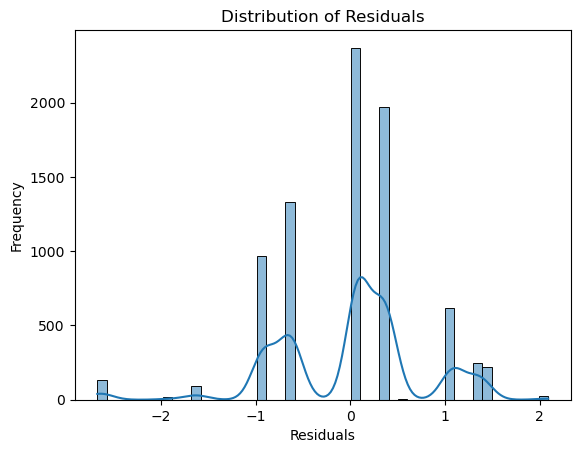

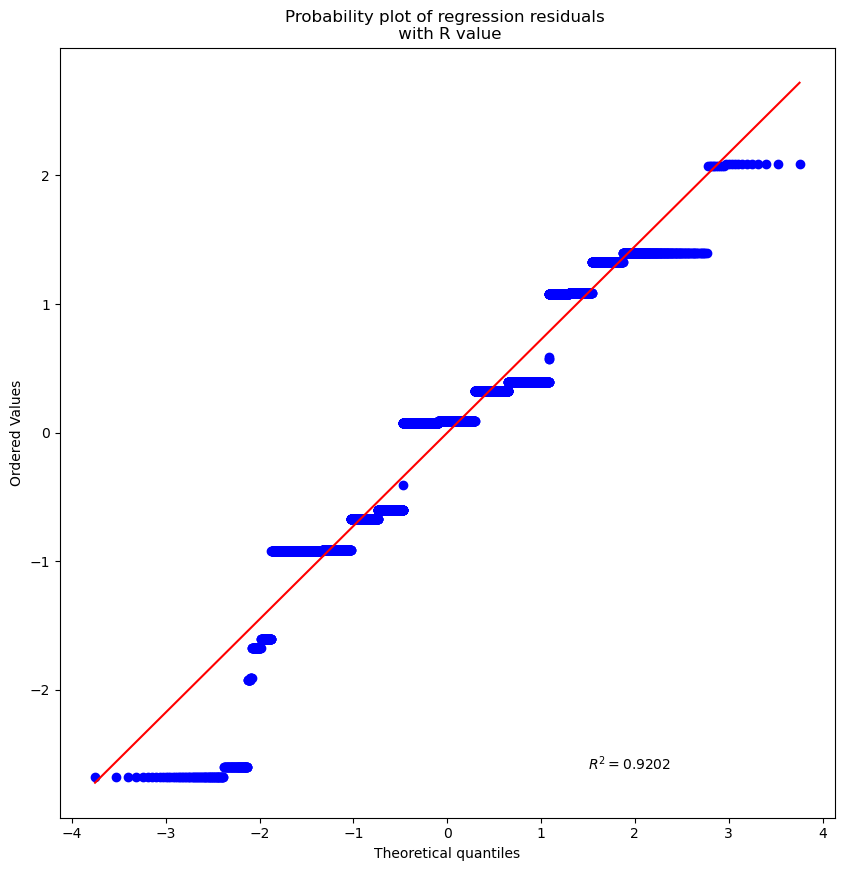

Mean of residuals: -1.3603784765336968e-14


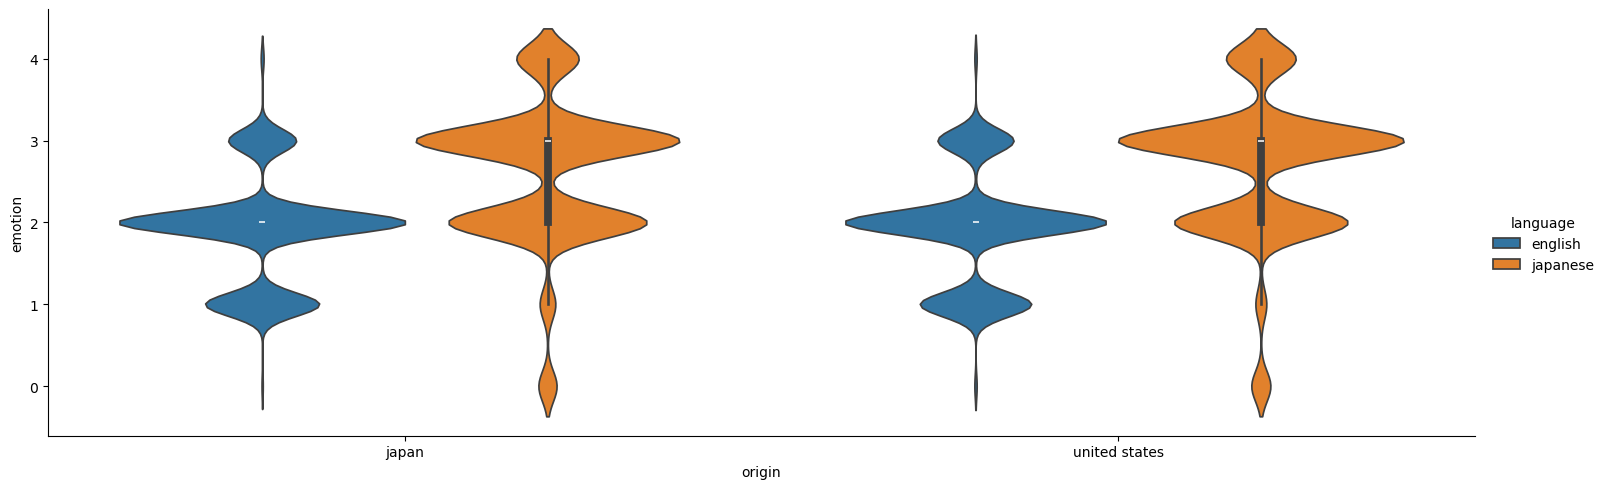

                            OLS Regression Results                            
Dep. Variable:                emotion   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     611.0
Date:                Sat, 23 Nov 2024   Prob (F-statistic):               0.00
Time:                        17:25:50   Log-Likelihood:                -9104.0
No. Observations:                8000   AIC:                         1.822e+04
Df Residuals:                    7996   BIC:                         1.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

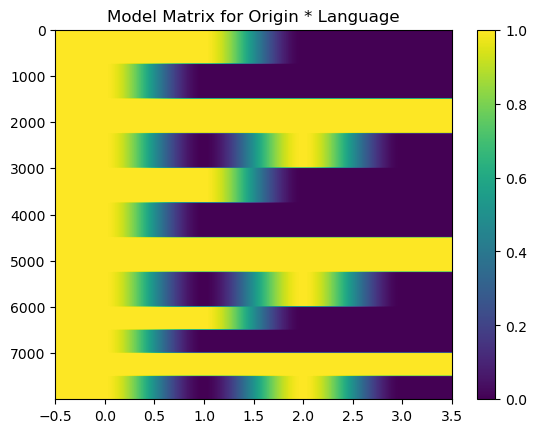

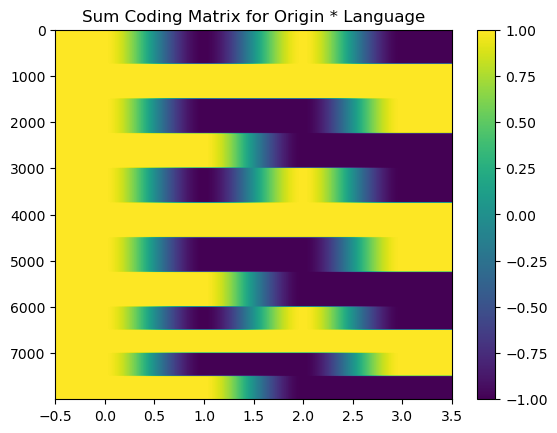

ANOVA for self-success  Emotion: responsible for others
                            sum_sq      df           F        PR(>F)
C(origin)                19.552531     1.0   50.865256  1.075656e-12
C(language)              53.710031     1.0  139.724851  5.638672e-32
C(origin):C(language)     3.591281     1.0    9.342598  2.246267e-03
Residual               3073.650875  7996.0         NaN           NaN
8000.0
Test statistic:  431.9581
At 15.0% significance, 431.9581 > 0.5760 data does not look normal (reject H0)
At 10.0% significance, 431.9581 > 0.6560 data does not look normal (reject H0)
At 5.0% significance, 431.9581 > 0.7870 data does not look normal (reject H0)
At 2.5% significance, 431.9581 > 0.9180 data does not look normal (reject H0)
At 1.0% significance, 431.9581 > 1.0910 data does not look normal (reject H0)
0   -0.53225
1    0.46775
2    0.46775
3    0.46775
4    0.46775
dtype: float64


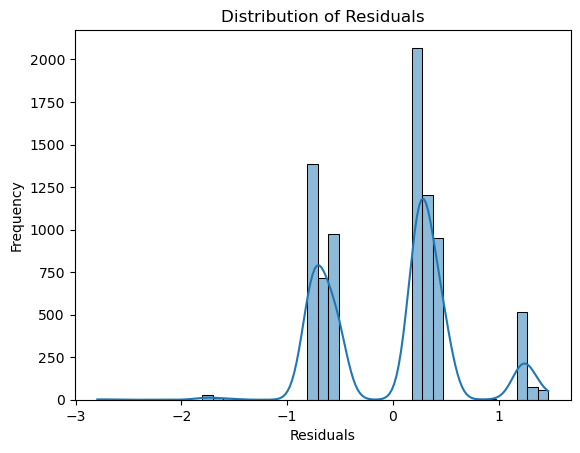

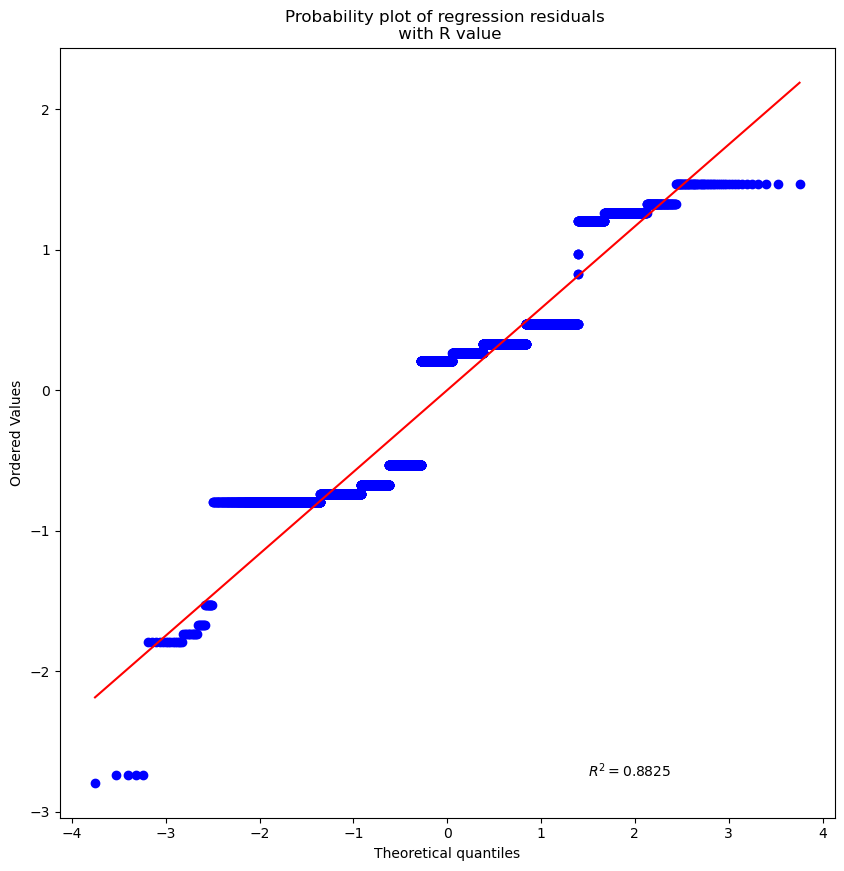

Mean of residuals: -1.951327988081175e-14


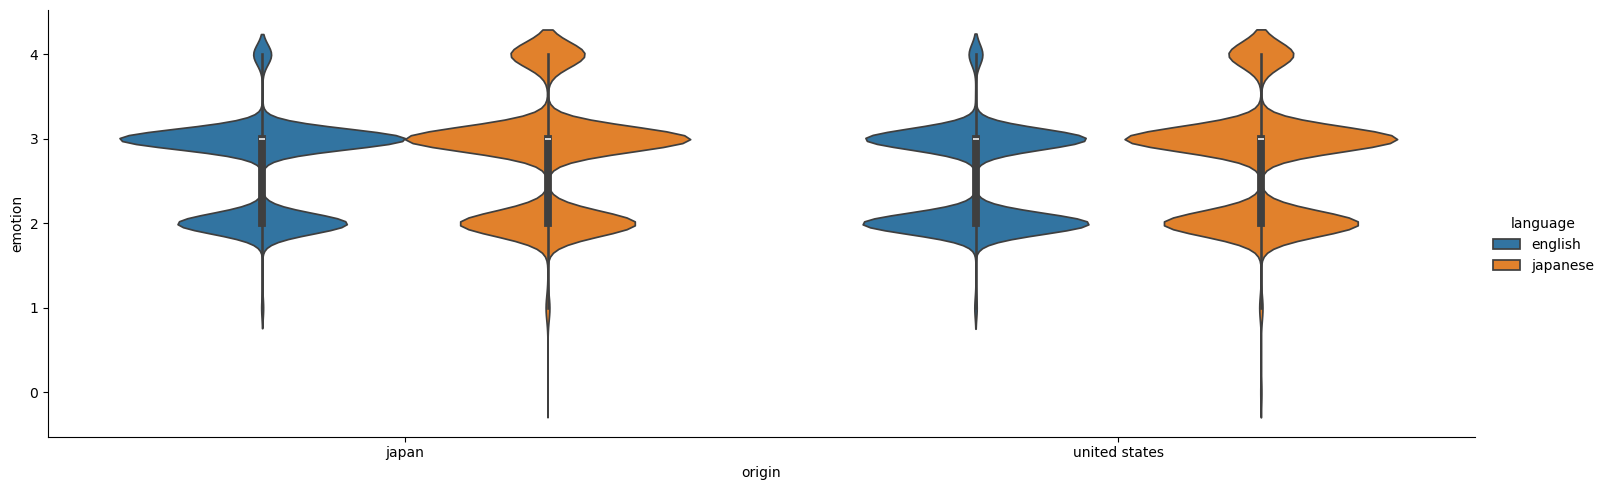

                            OLS Regression Results                            
Dep. Variable:                emotion   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     66.64
Date:                Sat, 23 Nov 2024   Prob (F-statistic):           1.47e-42
Time:                        17:25:51   Log-Likelihood:                -7525.2
No. Observations:                8000   AIC:                         1.506e+04
Df Residuals:                    7996   BIC:                         1.509e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

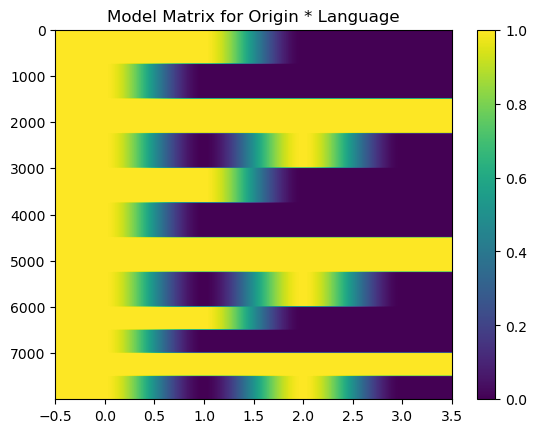

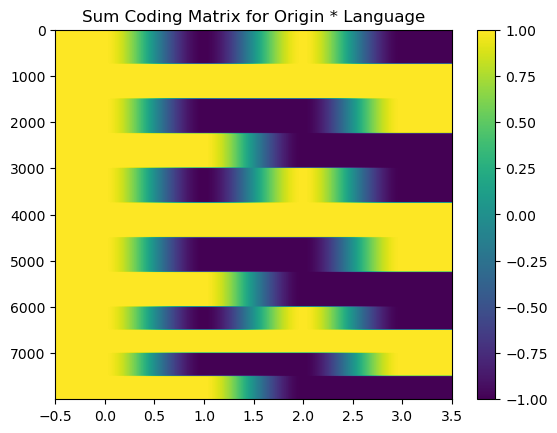

ANOVA for self-success  Emotion: happiness
                            sum_sq      df          F        PR(>F)
C(origin)                 1.431125     1.0   3.749389  5.286202e-02
C(language)              25.200125     1.0  66.021535  5.128538e-16
C(origin):C(language)     0.078125     1.0   0.204679  6.509827e-01
Residual               3052.037500  7996.0        NaN           NaN
8000.0
Test statistic:  653.5184
At 15.0% significance, 653.5184 > 0.5760 data does not look normal (reject H0)
At 10.0% significance, 653.5184 > 0.6560 data does not look normal (reject H0)
At 5.0% significance, 653.5184 > 0.7870 data does not look normal (reject H0)
At 2.5% significance, 653.5184 > 0.9180 data does not look normal (reject H0)
At 1.0% significance, 653.5184 > 1.0910 data does not look normal (reject H0)
0   -0.366
1   -0.366
2   -0.366
3   -0.366
4    0.634
dtype: float64


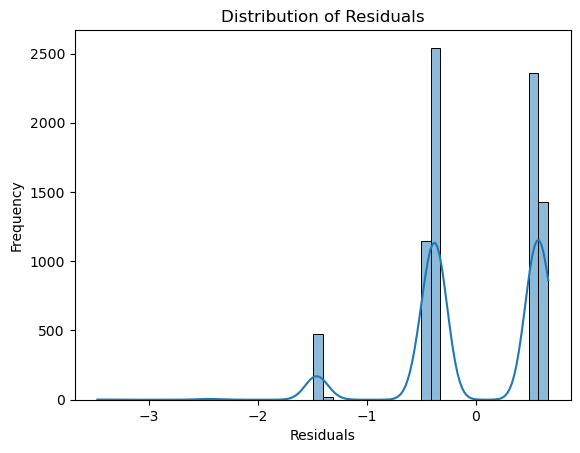

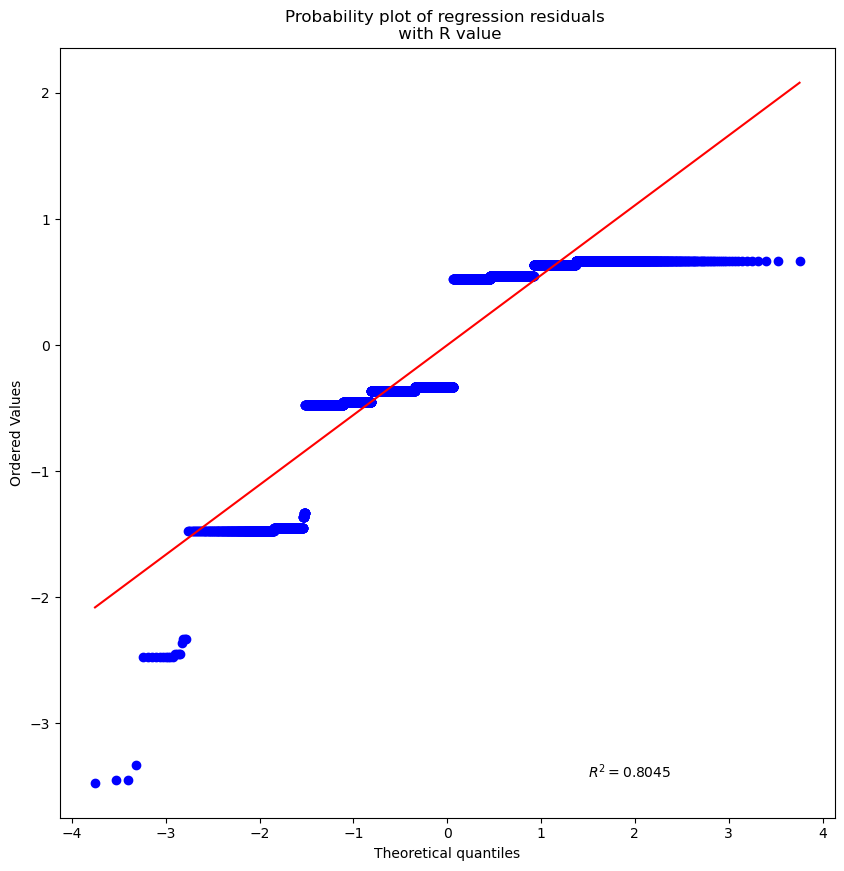

Mean of residuals: -4.587885626960997e-14


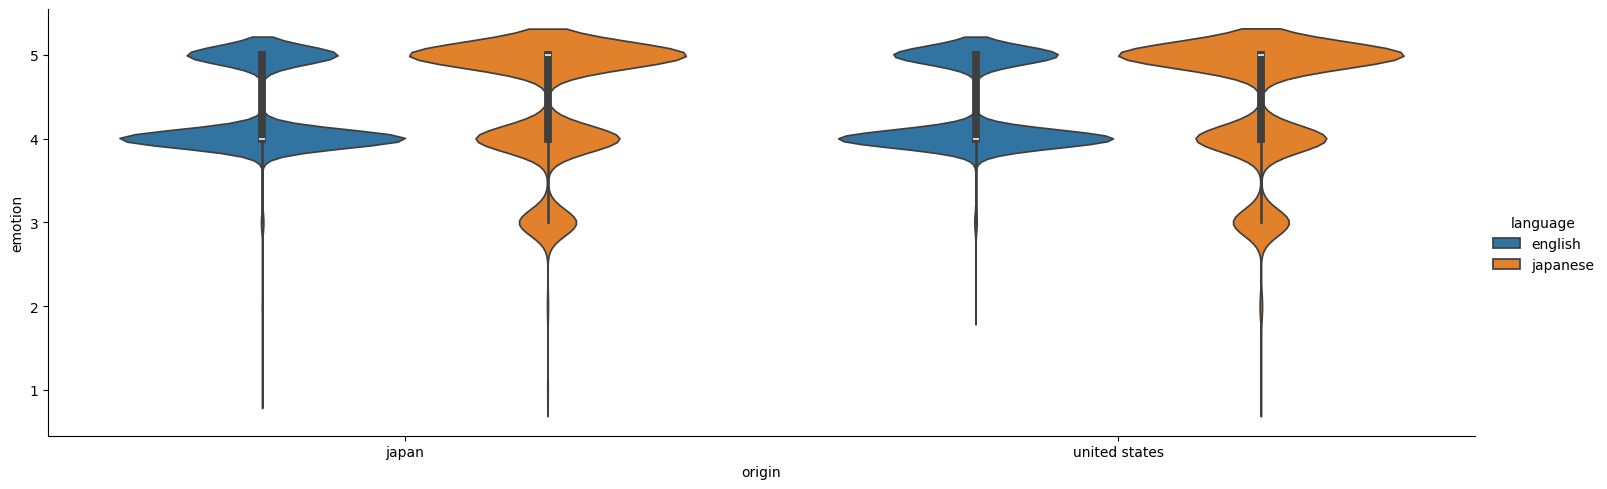

                            OLS Regression Results                            
Dep. Variable:                emotion   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     23.33
Date:                Sat, 23 Nov 2024   Prob (F-statistic):           5.01e-15
Time:                        17:25:52   Log-Likelihood:                -7497.0
No. Observations:                8000   AIC:                         1.500e+04
Df Residuals:                    7996   BIC:                         1.503e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

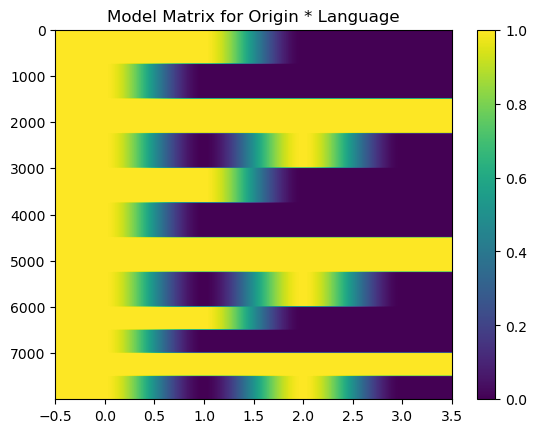

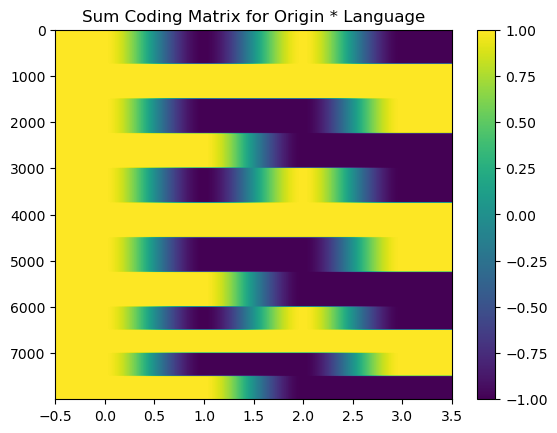

ANOVA for self-success  Emotion: fear
                          sum_sq      df           F         PR(>F)
C(origin)                11.4005     1.0   17.332145   3.171267e-05
C(language)             407.7045     1.0  619.831886  7.734451e-132
C(origin):C(language)     0.3380     1.0    0.513860   4.734934e-01
Residual               5259.4990  7996.0         NaN            NaN
8000.0
Test statistic:  141.4452
At 15.0% significance, 141.4452 > 0.5760 data does not look normal (reject H0)
At 10.0% significance, 141.4452 > 0.6560 data does not look normal (reject H0)
At 5.0% significance, 141.4452 > 0.7870 data does not look normal (reject H0)
At 2.5% significance, 141.4452 > 0.9180 data does not look normal (reject H0)
At 1.0% significance, 141.4452 > 1.0910 data does not look normal (reject H0)
0    0.4065
1    0.4065
2   -0.5935
3   -0.5935
4    0.4065
dtype: float64


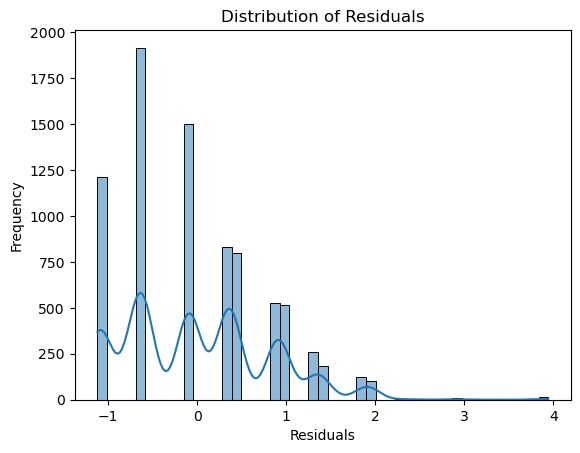

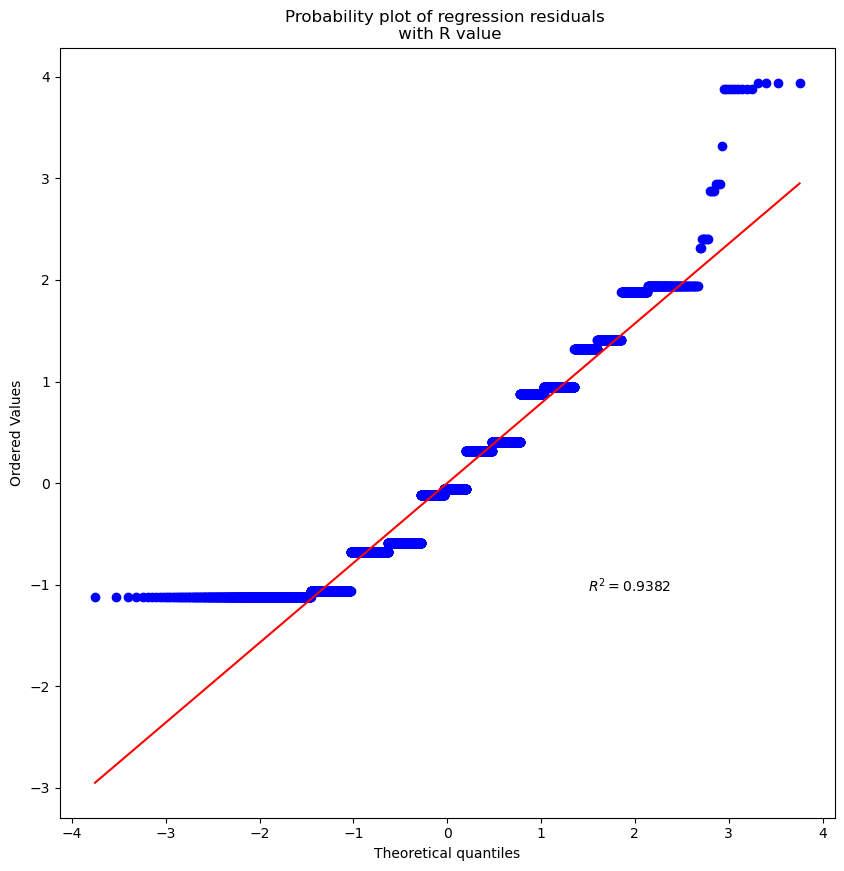

Mean of residuals: -3.886668764607748e-15


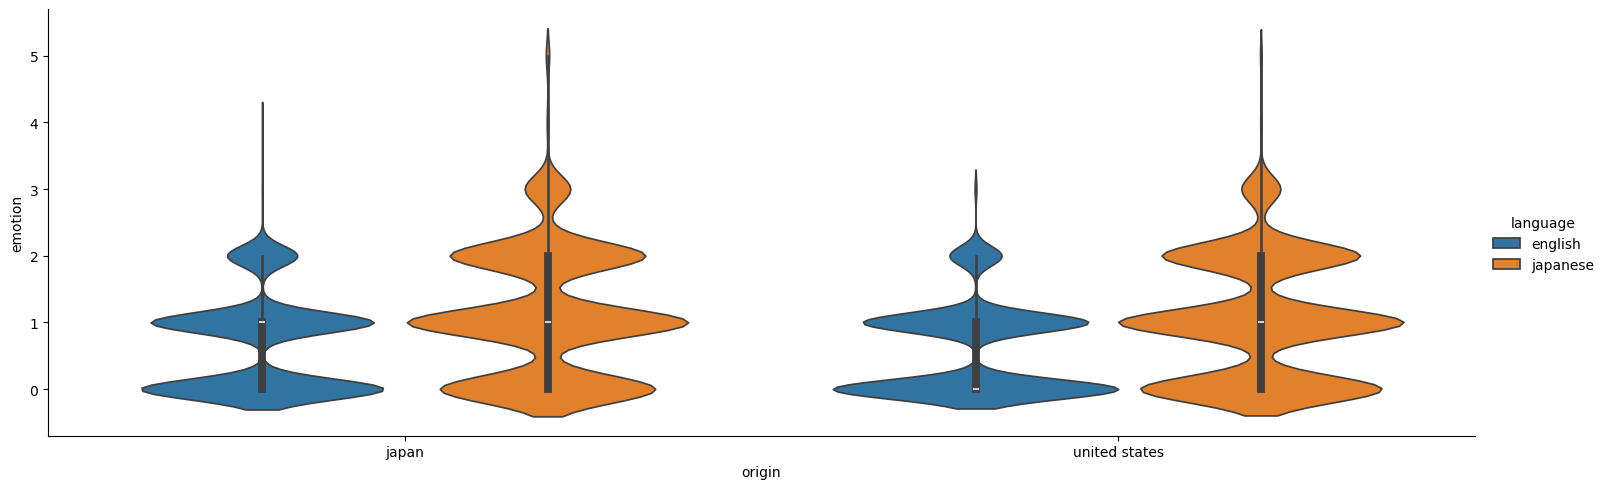

                            OLS Regression Results                            
Dep. Variable:                emotion   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     212.6
Date:                Sat, 23 Nov 2024   Prob (F-statistic):          1.16e-132
Time:                        17:25:53   Log-Likelihood:                -9673.9
No. Observations:                8000   AIC:                         1.936e+04
Df Residuals:                    7996   BIC:                         1.938e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

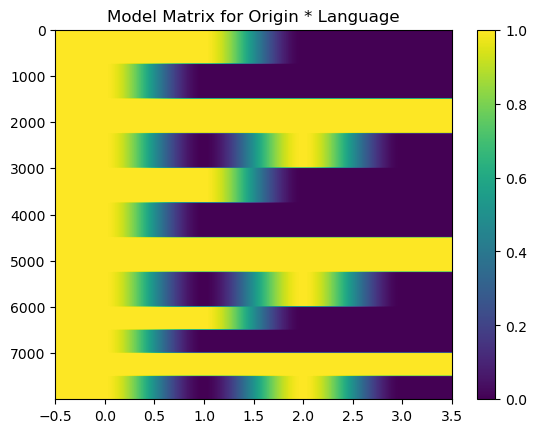

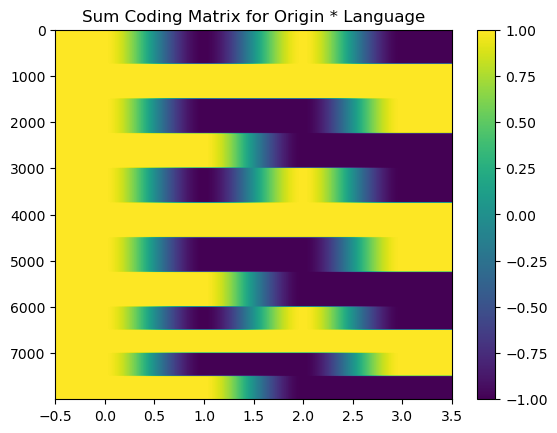

ANOVA for self-success  Emotion: positive
                            sum_sq      df           F        PR(>F)
C(origin)                 5.778125     1.0   23.054679  1.603192e-06
C(language)              35.245125     1.0  140.627805  3.606829e-32
C(origin):C(language)     4.753125     1.0   18.964936  1.348028e-05
Residual               2004.013500  7996.0         NaN           NaN
8000.0
Test statistic:  884.5733
At 15.0% significance, 884.5733 > 0.5760 data does not look normal (reject H0)
At 10.0% significance, 884.5733 > 0.6560 data does not look normal (reject H0)
At 5.0% significance, 884.5733 > 0.7870 data does not look normal (reject H0)
At 2.5% significance, 884.5733 > 0.9180 data does not look normal (reject H0)
At 1.0% significance, 884.5733 > 1.0910 data does not look normal (reject H0)
0   -0.49
1   -0.49
2    0.51
3   -0.49
4   -0.49
dtype: float64


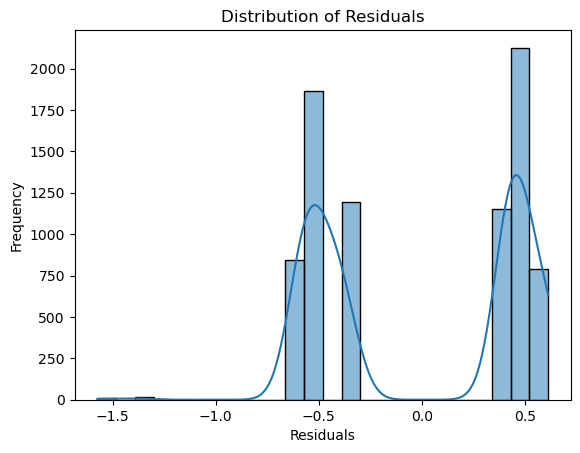

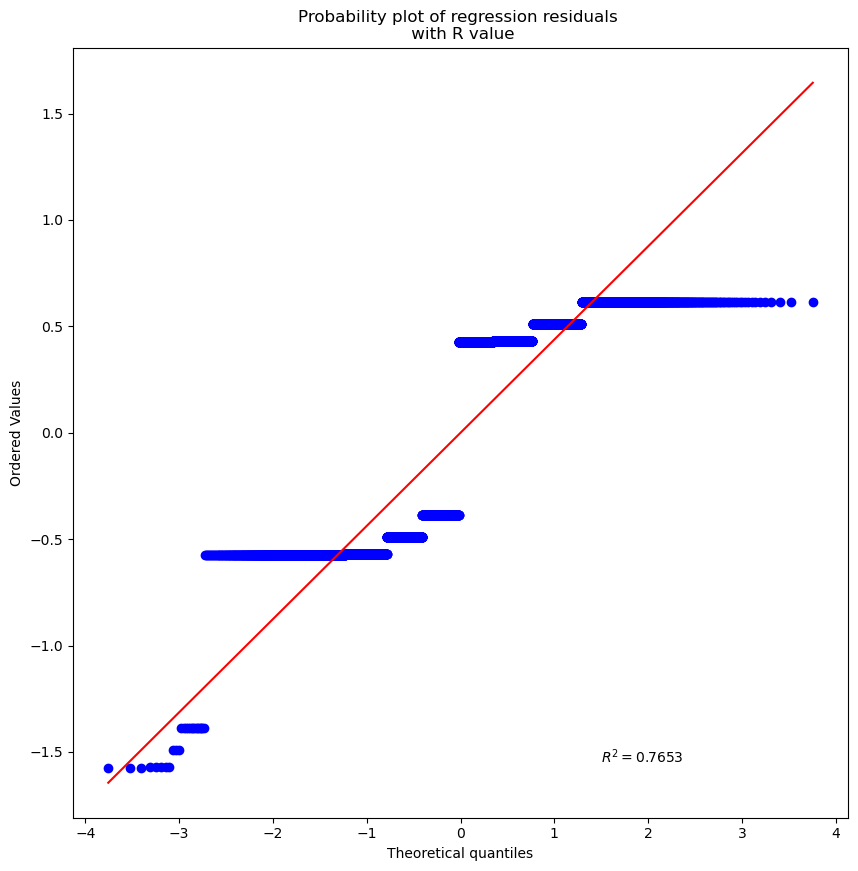

Mean of residuals: -2.7362112575701757e-14


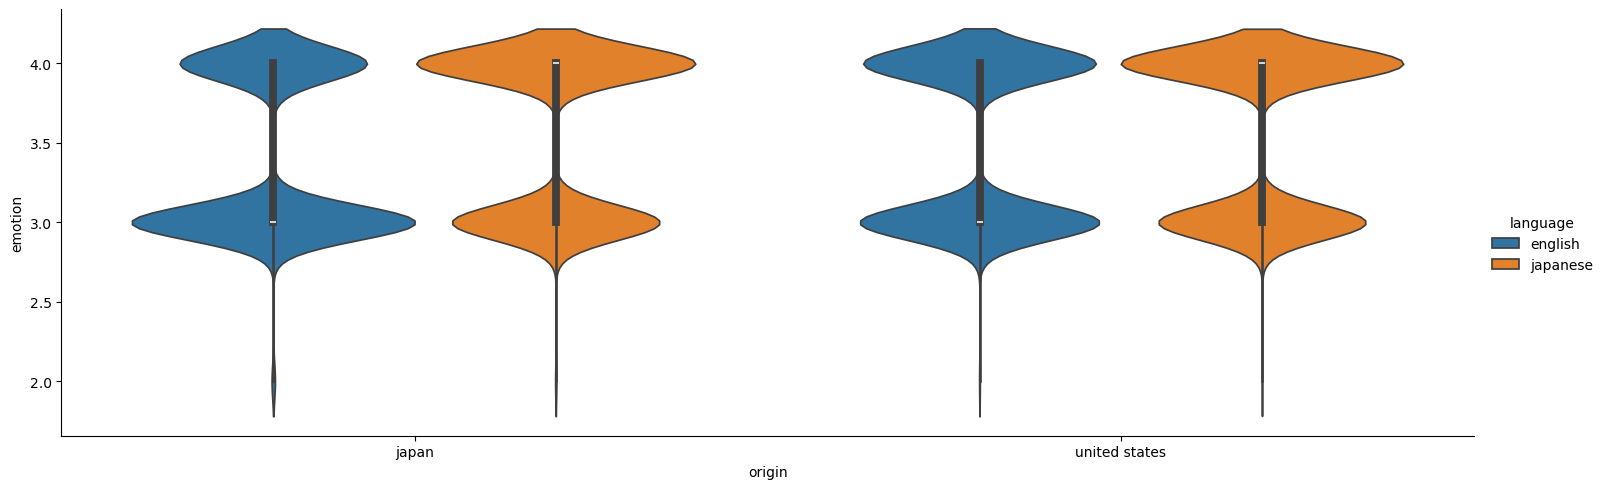

                            OLS Regression Results                            
Dep. Variable:                emotion   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     60.88
Date:                Sat, 23 Nov 2024   Prob (F-statistic):           6.53e-39
Time:                        17:25:54   Log-Likelihood:                -5814.3
No. Observations:                8000   AIC:                         1.164e+04
Df Residuals:                    7996   BIC:                         1.166e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

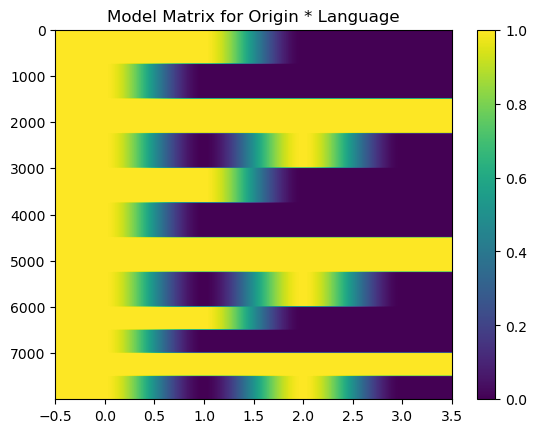

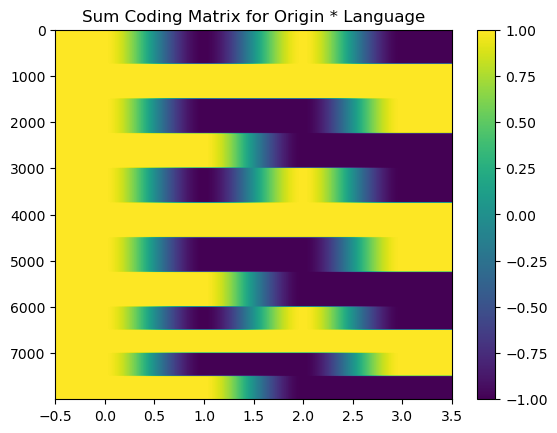

ANOVA for self-success  Emotion: negative
                            sum_sq      df         F    PR(>F)
C(origin)                 0.036125     1.0  0.160397  0.688802
C(language)               0.066125     1.0  0.293599  0.587939
C(origin):C(language)     0.066125     1.0  0.293599  0.587939
Residual               1800.878500  7996.0       NaN       NaN
8000.0
Test statistic:  1852.6390
At 15.0% significance, 1852.6390 > 0.5760 data does not look normal (reject H0)
At 10.0% significance, 1852.6390 > 0.6560 data does not look normal (reject H0)
At 5.0% significance, 1852.6390 > 0.7870 data does not look normal (reject H0)
At 2.5% significance, 1852.6390 > 0.9180 data does not look normal (reject H0)
At 1.0% significance, 1852.6390 > 1.0910 data does not look normal (reject H0)
0    0.0235
1    0.0235
2    0.0235
3    0.0235
4    0.0235
dtype: float64


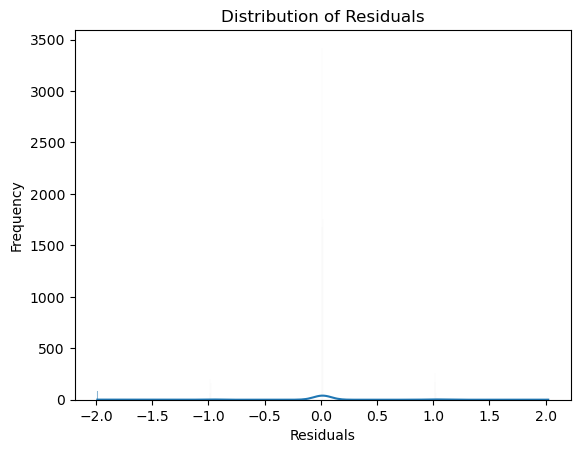

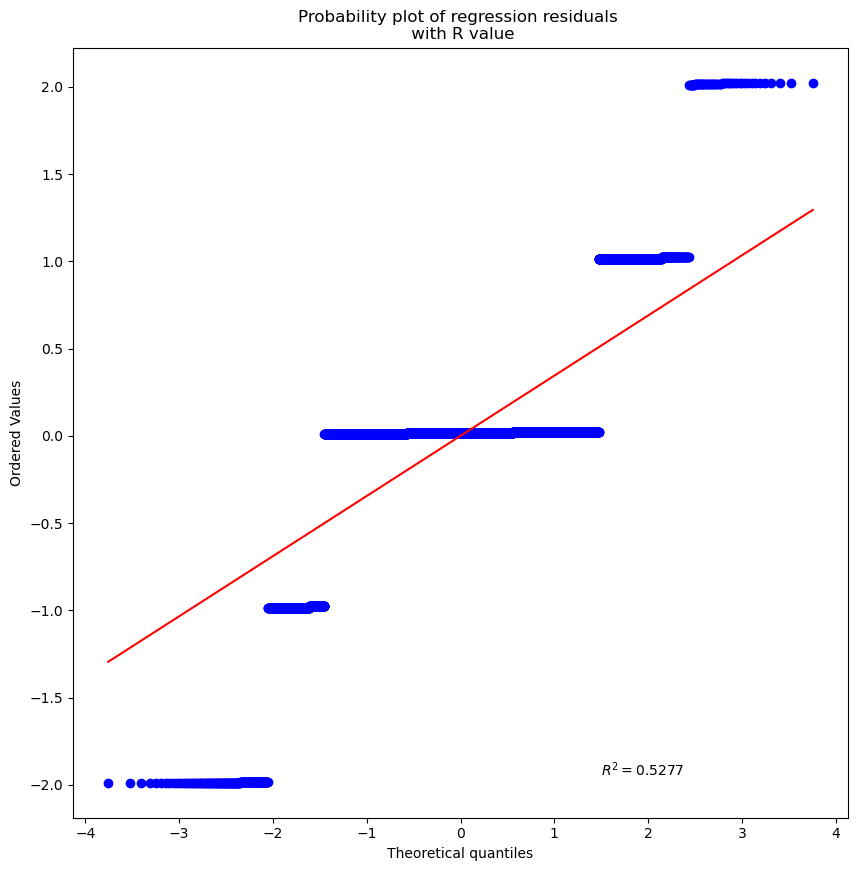

Mean of residuals: -1.8549606295437117e-14


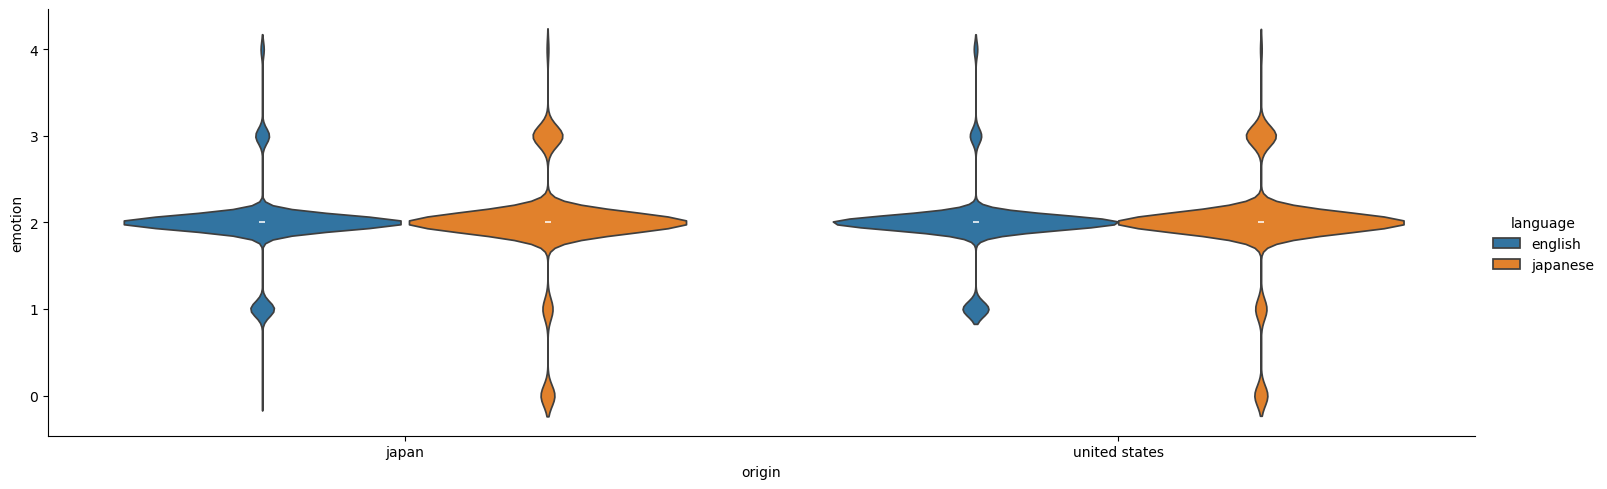

                            OLS Regression Results                            
Dep. Variable:                emotion   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.2492
Date:                Sat, 23 Nov 2024   Prob (F-statistic):              0.862
Time:                        17:25:56   Log-Likelihood:                -5386.8
No. Observations:                8000   AIC:                         1.078e+04
Df Residuals:                    7996   BIC:                         1.081e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

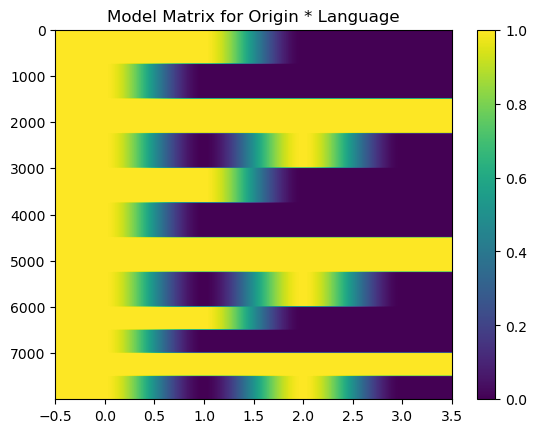

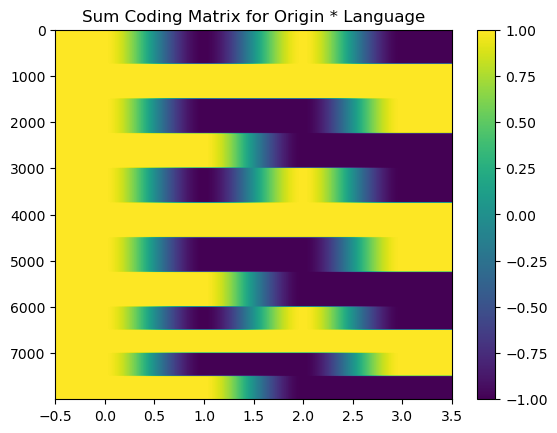

ANOVA for self-failure  Emotion: motivation
                            sum_sq      df            F    PR(>F)
C(origin)                15.975781     1.0    22.862902  0.000002
C(language)            1412.460281     1.0  2021.368503  0.000000
C(origin):C(language)     0.935281     1.0     1.338479  0.247337
Residual               5587.319875  7996.0          NaN       NaN
8000.0
Test statistic:  265.2634
At 15.0% significance, 265.2634 > 0.5760 data does not look normal (reject H0)
At 10.0% significance, 265.2634 > 0.6560 data does not look normal (reject H0)
At 5.0% significance, 265.2634 > 0.7870 data does not look normal (reject H0)
At 2.5% significance, 265.2634 > 0.9180 data does not look normal (reject H0)
At 1.0% significance, 265.2634 > 1.0910 data does not look normal (reject H0)
5    0.44
6    0.44
7    1.44
8    0.44
9    0.44
dtype: float64


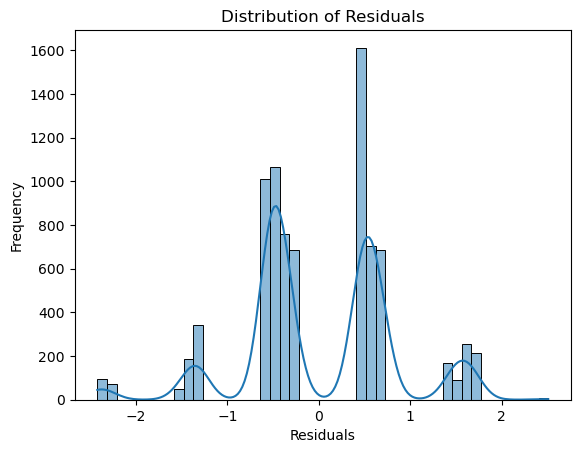

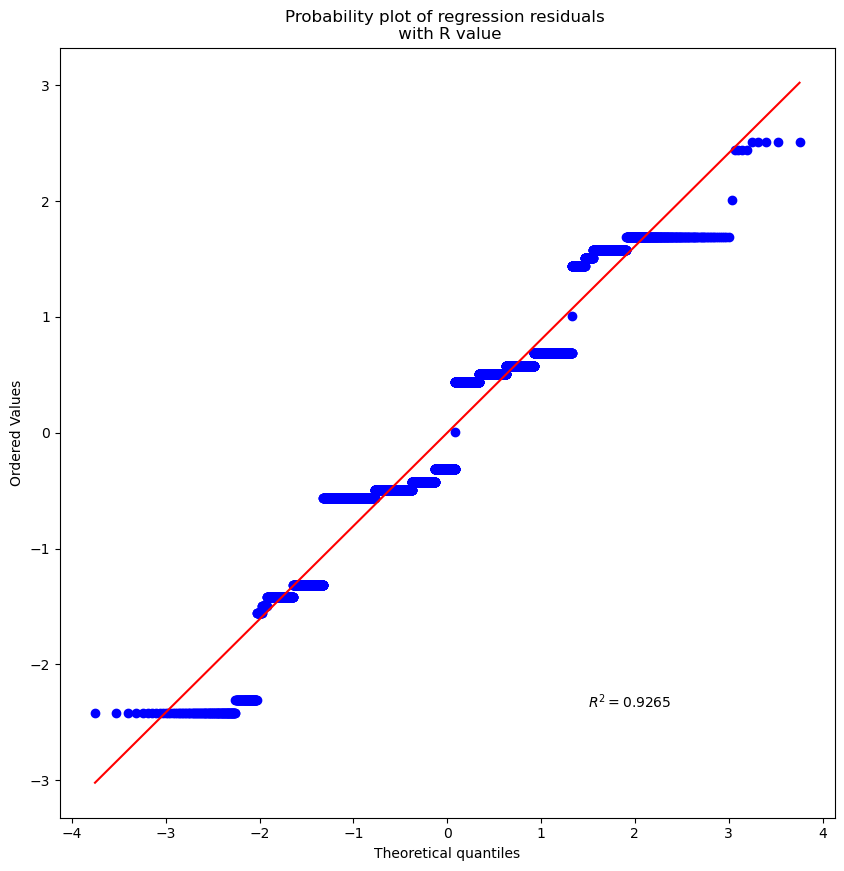

Mean of residuals: -1.2084111489230053e-14


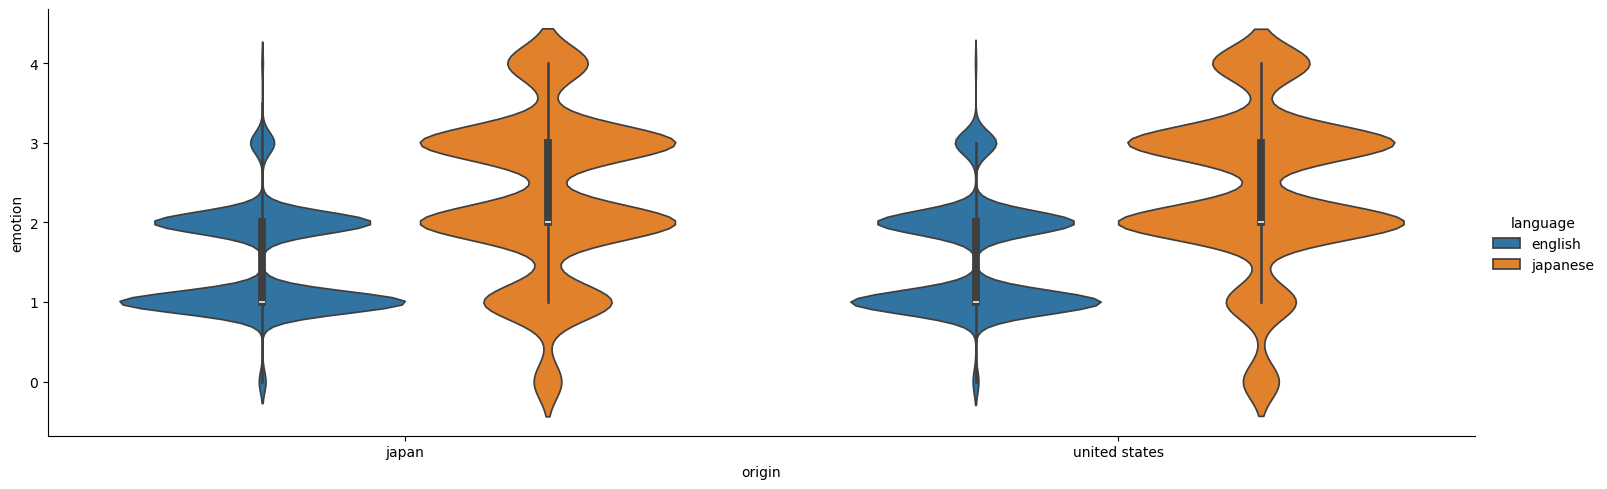

                            OLS Regression Results                            
Dep. Variable:                emotion   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     681.9
Date:                Sat, 23 Nov 2024   Prob (F-statistic):               0.00
Time:                        17:25:57   Log-Likelihood:                -9915.7
No. Observations:                8000   AIC:                         1.984e+04
Df Residuals:                    7996   BIC:                         1.987e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

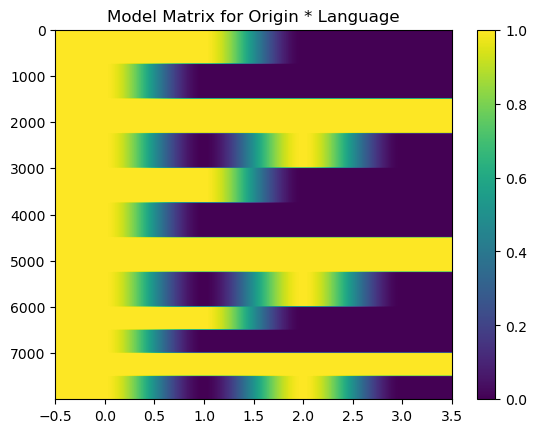

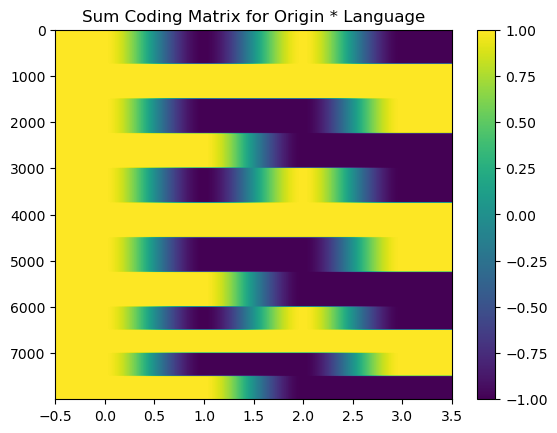

ANOVA for self-failure  Emotion: responsible for others
                            sum_sq      df          F    PR(>F)
C(origin)                 2.032031     1.0   3.639653  0.056454
C(language)               6.583781     1.0  11.792474  0.000598
C(origin):C(language)     2.032031     1.0   3.639653  0.056454
Residual               4464.195875  7996.0        NaN       NaN
8000.0
Test statistic:  609.9520
At 15.0% significance, 609.9520 > 0.5760 data does not look normal (reject H0)
At 10.0% significance, 609.9520 > 0.6560 data does not look normal (reject H0)
At 5.0% significance, 609.9520 > 0.7870 data does not look normal (reject H0)
At 2.5% significance, 609.9520 > 0.9180 data does not look normal (reject H0)
At 1.0% significance, 609.9520 > 1.0910 data does not look normal (reject H0)
5    0.425
6    1.425
7    1.425
8    0.425
9    1.425
dtype: float64


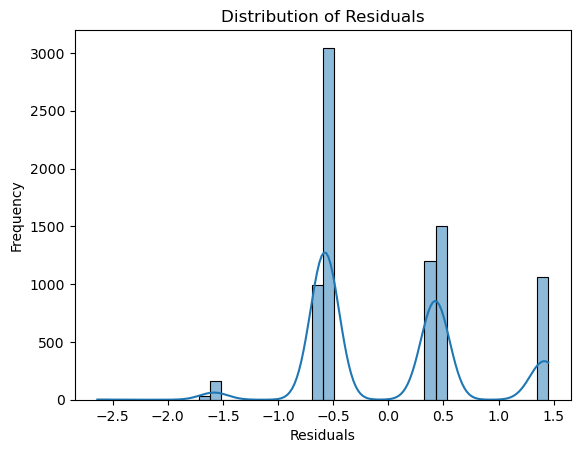

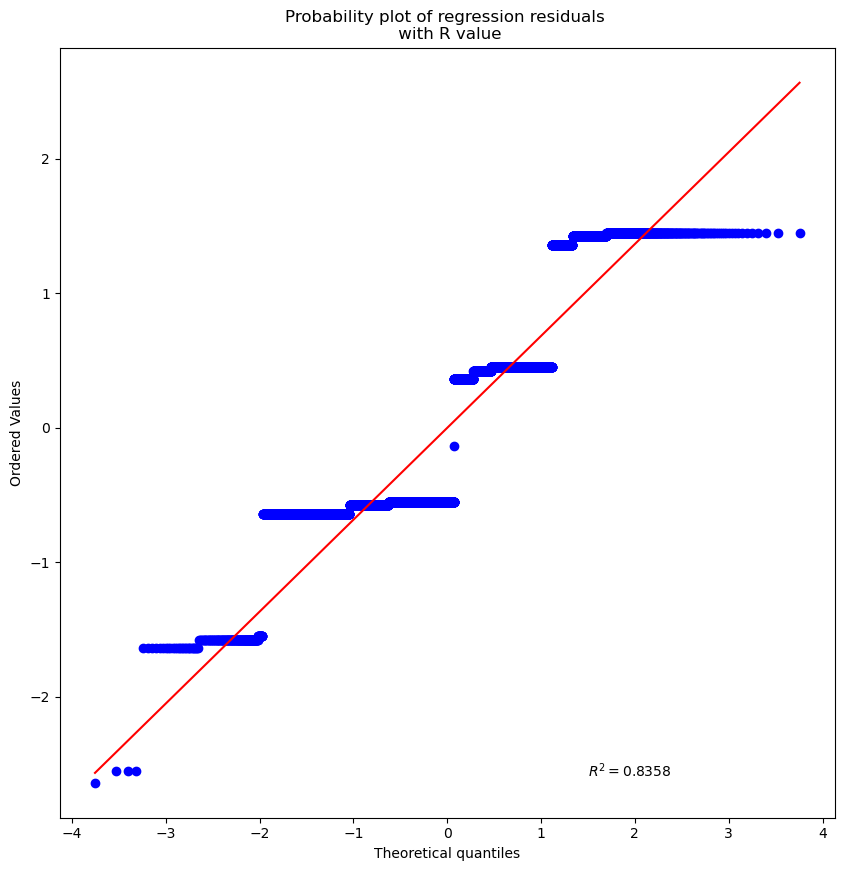

Mean of residuals: -1.13402620627312e-14


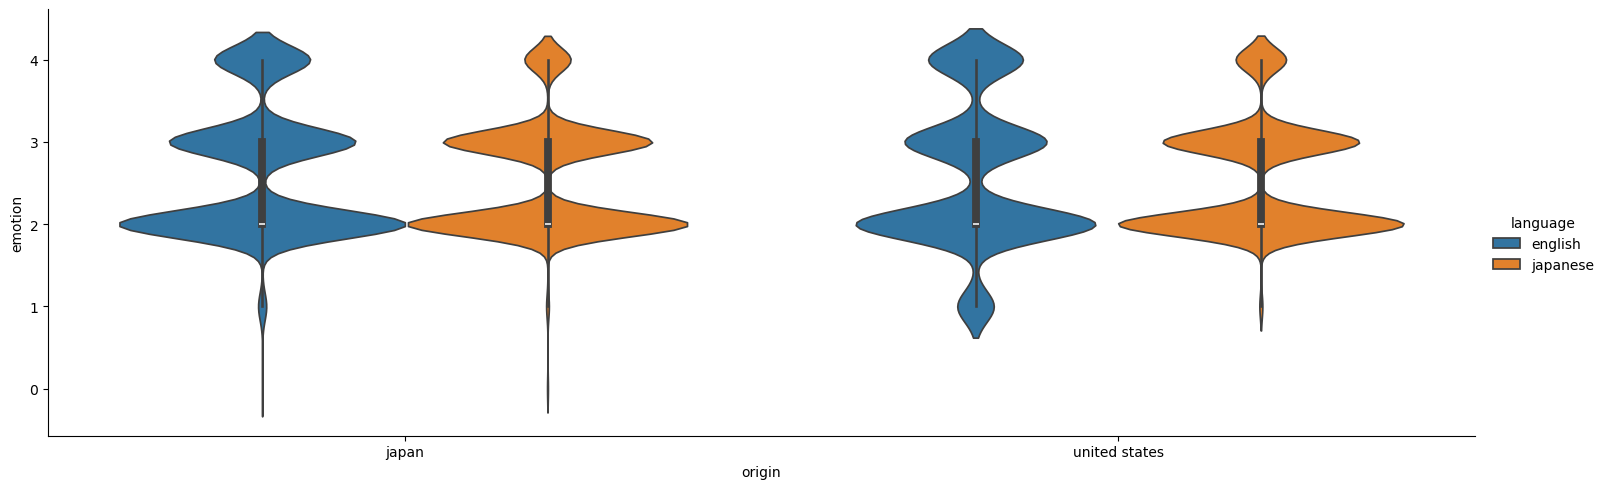

                            OLS Regression Results                            
Dep. Variable:                emotion   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     6.357
Date:                Sat, 23 Nov 2024   Prob (F-statistic):           0.000267
Time:                        17:25:58   Log-Likelihood:                -9018.1
No. Observations:                8000   AIC:                         1.804e+04
Df Residuals:                    7996   BIC:                         1.807e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

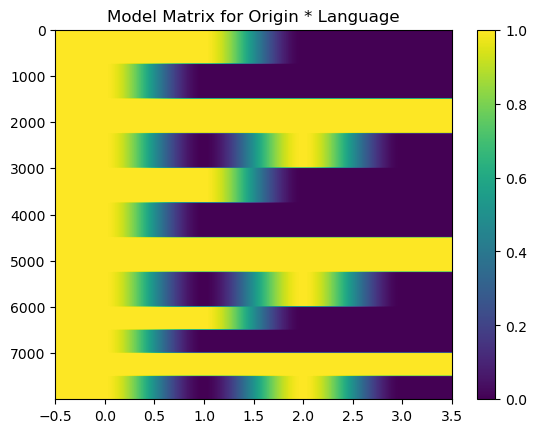

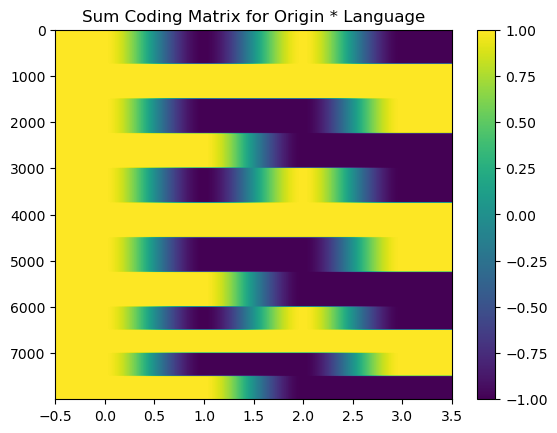

ANOVA for self-failure  Emotion: responsible for myself
                            sum_sq      df         F    PR(>F)
C(origin)                 2.538281     1.0  6.877146  0.008747
C(language)               1.554031     1.0  4.210447  0.040208
C(origin):C(language)     0.770281     1.0  2.086978  0.148599
Residual               2951.238375  7996.0       NaN       NaN
8000.0
Test statistic:  826.7250
At 15.0% significance, 826.7250 > 0.5760 data does not look normal (reject H0)
At 10.0% significance, 826.7250 > 0.6560 data does not look normal (reject H0)
At 5.0% significance, 826.7250 > 0.7870 data does not look normal (reject H0)
At 2.5% significance, 826.7250 > 0.9180 data does not look normal (reject H0)
At 1.0% significance, 826.7250 > 1.0910 data does not look normal (reject H0)
5    0.2155
6    0.2155
7   -0.7845
8    0.2155
9    1.2155
dtype: float64


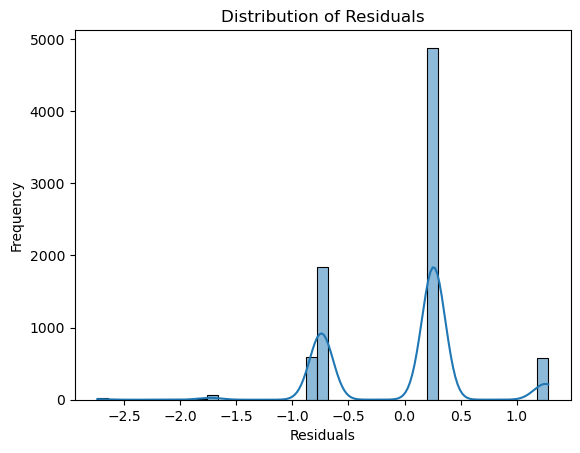

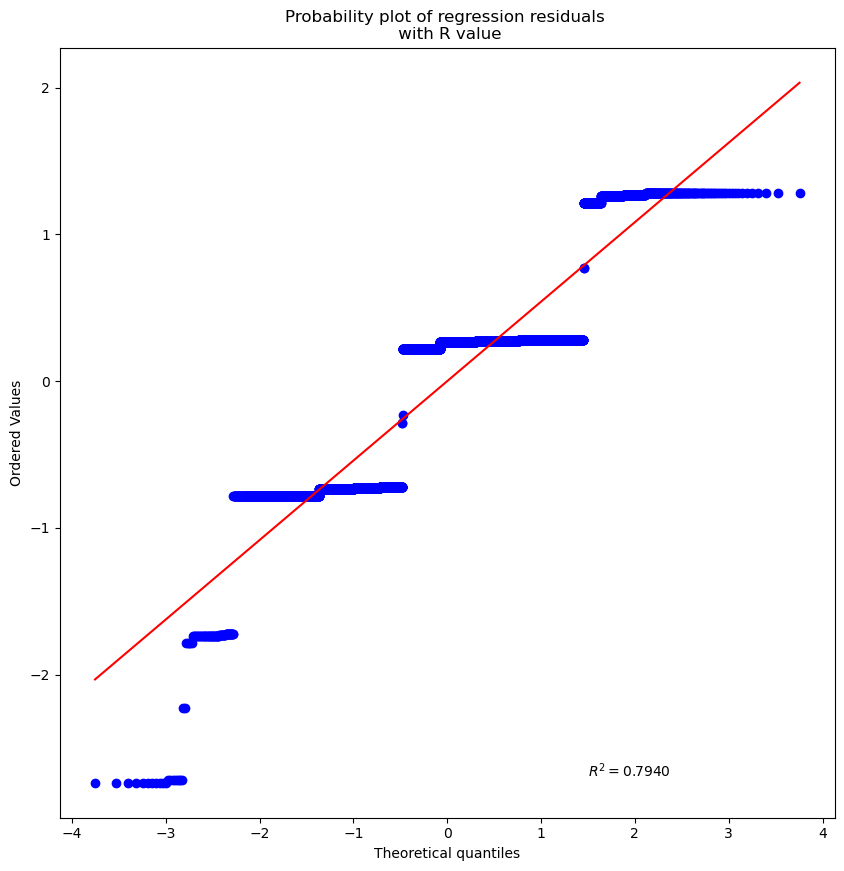

Mean of residuals: -2.753530736754328e-14


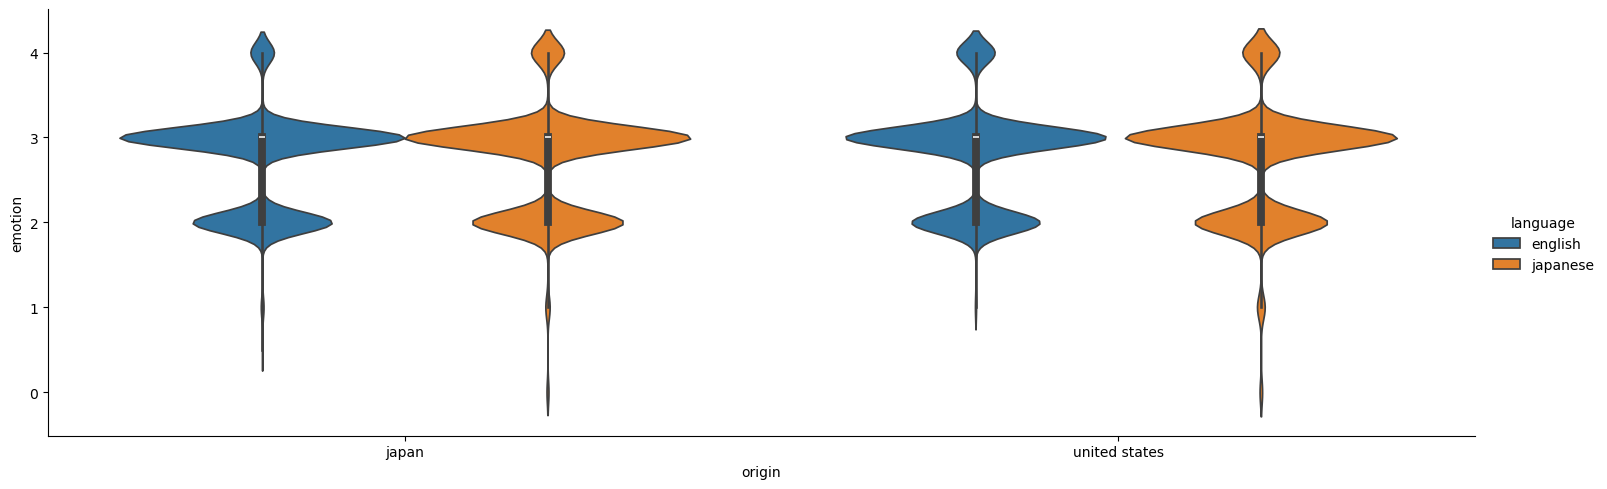

                            OLS Regression Results                            
Dep. Variable:                emotion   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     4.392
Date:                Sat, 23 Nov 2024   Prob (F-statistic):            0.00429
Time:                        17:25:59   Log-Likelihood:                -7362.6
No. Observations:                8000   AIC:                         1.473e+04
Df Residuals:                    7996   BIC:                         1.476e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

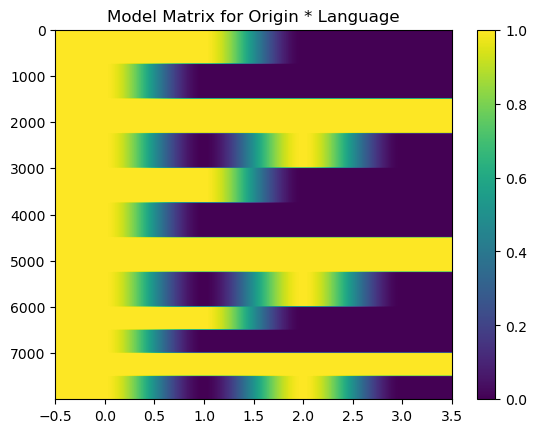

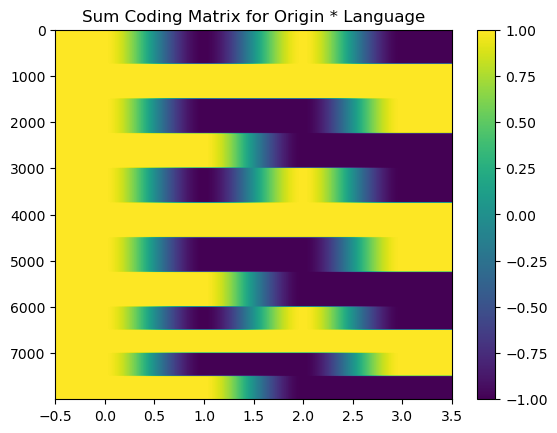

In [14]:
main(df)  